
## Table of contents

[Import data](#abs_1)<br>

[Preprocessing](#abs_2)<br>




In [2]:
import pandas as pd
import numpy as np
import re #look for matches in strings
from datetime import datetime

from functions.custom_functions import *


In [3]:
#Stop words
sw = ['?', '??', '???', 'check', 'found', 'amazon', 'damaged', 'damages', 'amazon', 
     'crushed', 'sold as set on dotcom', 'water damage', 'Found', 'missing','???lost',
     'AMAZON', 'Damaged', 'counted', 'wet pallet', '????missing','Water damaged', 'adjustment', 
     'dotcom', 'mouldy, thrown away.', 'Show Samples', 'lost', 'incorrectly made-thrown away.', 're-adjustment',
     'damages/dotcom?', 'sold as set/6 by dotcom', 'cracked', 'crushed ctn','taig adjust no stock',
     'POSSIBLE DAMAGES OR LOST?', "Dotcom sold in 6's", "sold in set?", 'reverse 21/5/10 adjustment',
     "can't find", "?missing", '?? missing', 'amazon adjust', 'Dotcom set', 'wrongly sold as sets', 
      '?sold as sets?', 'mouldy, unsaleable.', 'Amazon', 'faulty', 'rcvd be air temp fix for dotcom sit',
     're dotcom quick fix.', 'Dotcom sales', 'missing?','reverse 21/5/10 adjustment', 
      'incorrectly put back into stock', 'damages?','had been put aside', 'wet boxes', 'wet rusty',
     'sold as set on dotcom', '????damages????', 'historic computer difference?....se', 
     'smashed', 'had been put aside', 'dotcomstock','mixed up', 'michel oops', 'test', 'lost in space',
     'amazon sales','FOUND', 'thrown away', 'wet pallet', '???missing', 'Water damaged', 'FBA',
     'dotcom sales', 'Dotcom', 'Dotcom sales', 'Damages/samples', 'on cargo order', 'adjustment', 'dotcom',
     'damages?', 'mystery! Only ever imported 1800', 'MIA', 'wet', 'samples', 'sold as set on dotcom and amazon', 
     'sold as 1', 'MERCHANT CHANDLER CREDIT ERROR, STO', 'OOPS ! adjustment','Missing', '?lost', 
      'found some more on shelf', 'reverse previous adjustment','Amazon sold sets', 'dotcom sold sets',
     'mix up with c', 'wrongly sold sets',  '? sold as sets?', 'damages/display', 'Not rcvd in 10/11/2010 delivery',
      'Amazon Adjustment', 'CHECK', 'damaged stock', 'showroom', 'found box', 'stock check', 'barcode problem',
     'Found in w/hse', 'damages/credits from ASOS.', 'damages?', 'damages/showroom etc', 'had been put aside',
      'DAMAGED', 'sold as 1', '?missing', 'taig adjust', 'Wet pallet-thrown away', 'Had been put aside.',
      'did  a credit  and did not tick ret', 'damages wax', 'thrown away', 'damages?', 'Adjustment', '?display?',
      'WET/MOULDY', 'adjust', 'damages wax', 'returned', 'mixed up', 'crushed', 'label mix up', 'lost??',
      'Sold as 1 on dotcom', 'sold as set by dotcom', 'smashed', 'Dagamed', 'water damaged', 'wrong barcode',
      'check?', 'wet/rusty', 'Thrown away.', 'ebay', 'thrown away', 'crushed boxes', 'stock creditted wrongly', 
      'stock check', 'wet damaged', 'test', 'samples/damages', 'to push order througha s stock was',
      'Unsaleable, destroyed.', 'wet damaged', 'Given away', 'wet?', 'Printing smudges/thrown away',
      'printing smudges/thrown away', 'thrown away',  'had been put aside', 'rusty throw away', 'Crushed',
      'mailout','temp adjustment', 'allocate stock for dotcom orders ta', 'add stock to allocate online orders', 
      'for online retail orders', 'website fixed', 'Breakages', 'smashed', 'wet damaged', 'incorrect stock entry.',
      'Lighthouse Trading zero invc incorr', 'Incorrect stock entry.','mouldy',
      'alan hodge cant mamage this section', 'incorrectly credited C550456 see 47' 
     ]

<a id="abs_1"></a>
<hr>

# Import data

In [4]:
data = pd.read_csv('/Users/Mariia/Documents/GitHub/Python_Project/Online_Retail.csv')

<a id="abs_2"></a>
<hr>

# Preprocessing

In [5]:
data.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
len(data)

541909

In [7]:
print_missing_values(data)

Missing Values:
index: No missing values
InvoiceNo: No missing values
StockCode: No missing values
Description: 1454 missing values, 0.27%
Quantity: No missing values
InvoiceDate: No missing values
UnitPrice: No missing values
CustomerID: 135080 missing values, 24.93%
Country: No missing values


### Number of unique invoices (21 items on average per customers)

In [8]:
#number of unique outcomes with .unique() for pandas

In [9]:
len(data['InvoiceNo'].unique())

25900

### Number of available products: StockCode and Description

In [10]:
len(data['StockCode'].unique())

4070

In [11]:
len(data['Description'].unique())

4224

In [12]:
sum(data['Description'].isna()) #we have missing and inconsistent values in description

1454

### remove spaces from the beginning and from the end of the description , and also double spaces

In [13]:
data['Description'] = remove_spaces(data['Description'])

There are more descriptions then Stock codes.
Investigate which stock codes have multiple descriptions

### remove rows where in description we have wrong code or like that 

In [14]:
#found descriptions with something wrong 
string_array = data['Description'].astype(str).tolist()

# Your pattern
pattern1 = re.compile(r'\bwrong', re.IGNORECASE) 
pattern2 = re.compile(r'code') 
pattern4 = re.compile(r'Marked') 
pattern5 = re.compile(r'207') 

# Find elemennts that match the pattern
matches = [s for s in string_array if (re.search(pattern1, s) or re.search(pattern2, s) or 
                                       re.search(pattern4, s) or
                                      re.search(pattern5, s))]
len(matches)

24

In [15]:
#removed wrong codes
data = data.loc[~data["Description"].isin(matches)]

### look for all bad stock codes

In [16]:
#new column DOne
data['addition'] = [ x if x in sw else np.nan for x in pd.Series(data['Description']) ]

In [17]:
#done
desc_arr = pd.Series(data['Description'])
data['Description'] = [ x if not (x in sw) else np.nan for x in desc_arr ]

In [18]:
data = remove_double_names(data)

In [19]:
#check whether there are still are stock codes with the multiple descriptions
stock = data['StockCode'].unique()
ind = []
for i in range(len(stock)):
    if len(data.loc[data['StockCode'] == stock[i]]['Description'].unique()) != 1:
        ind.append(i)#['CustomerID']
len(ind)

0

In [20]:
data.dropna(subset=['Description'], inplace=True)

In [21]:
print_missing_values(data)

Missing Values:
index: No missing values
InvoiceNo: No missing values
StockCode: No missing values
Description: No missing values
Quantity: No missing values
InvoiceDate: No missing values
UnitPrice: No missing values
CustomerID: 134928 missing values, 24.91%
Country: No missing values
addition: 541171 missing values, 99.89%


# Inspect further columns 

Quantity

In [22]:
min(data['Quantity'])

-80995

In [23]:
max(data['Quantity'])

80995

In [24]:
data.loc[data['Quantity'] < 0]  #10607 rows

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,addition
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,NaN
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,NaN
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,NaN
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,NaN
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...,...
540449,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,NaN
541541,541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,NaN
541715,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,NaN
541716,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,NaN


entities with Quantity <0,  inspect them further, there are descriptions like Discount, Manual... have a look on them  

In [25]:
data = data.loc[~data['Quantity'] < 0]  #can remove them 

In [26]:
data.head(5)


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,addition
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,NaN
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,NaN
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN


In [27]:
data = data.loc[data['UnitPrice'] > 0] 

In [28]:
#Transform InvoiceDate into date format

#[datetime.strptime(x, '%m/%d/%Y %H:%M') for x in data['InvoiceDate']]

CustomerID

In [29]:
sum(pd.Series(data['CustomerID']).isna()) #135056 missing values, can process without them

132220

Country

In [30]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [39]:
data.head(2)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,addition
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,NaN
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,NaN


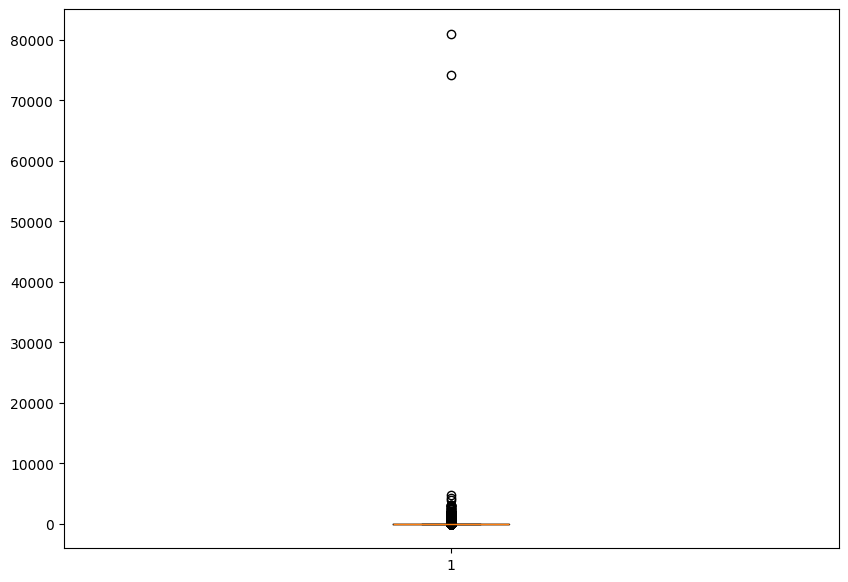

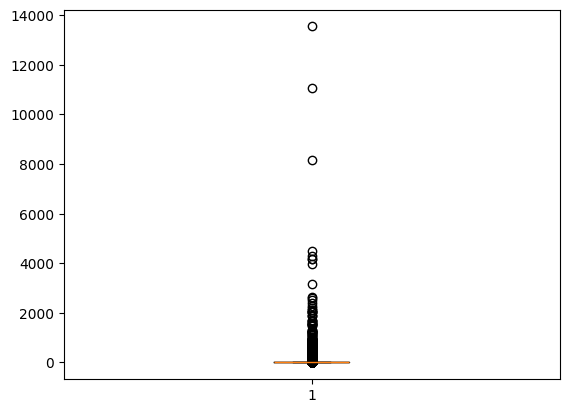

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data['Quantity'])
plt.show()
plt.boxplot(data['UnitPrice'])
 
# show plot
plt.show()